#Assessment 1


Name : Iqbal Saviola Syah B

NIM : 1301190318

###Data Preparation and Import Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [68]:
df = pd.read_csv('https://raw.githubusercontent.com/iqbalsaviola/assessmentIoT/main/Activity%20Recognition%20from%20Single%20Chest-Mounted%20Accelerometer/4.csv')
df.head()

,0,2045,2326,1833,1
0,1.0,2041,2317,1832,1
1,2.0,2046,2323,1836,1
2,3.0,2046,2339,1833,1
3,4.0,2045,2335,1829,1
4,5.0,2042,2332,1834,1


In [69]:
# Naming the column dataframe, for further use
df = df.set_axis(['A', 'B', 'C', 'D', 'E'], axis=1, inplace=False)
df.head()

,A,B,C,D,E
0,1.0,2041,2317,1832,1
1,2.0,2046,2323,1836,1
2,3.0,2046,2339,1833,1
3,4.0,2045,2335,1829,1
4,5.0,2042,2332,1834,1


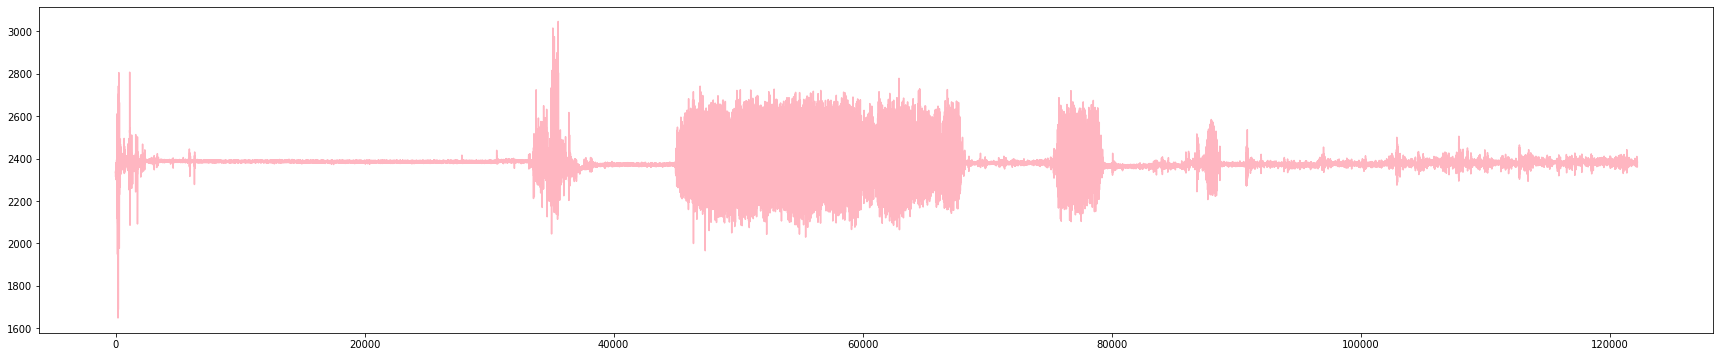

In [25]:
# Test and plot one of the column
plt.figure(figsize=(30,6))
plt.plot(df["C"], color = "lightpink")
plt.show()

The size dataframe is too large to identify, further use we will drop them, and only use 100 data.

In [26]:
# drop rows for futher usea
df2 = df[:100]
df2.head()

,A,B,C,D,E
0,1.0,2041,2317,1832,1
1,2.0,2046,2323,1836,1
2,3.0,2046,2339,1833,1
3,4.0,2045,2335,1829,1
4,5.0,2042,2332,1834,1


###LPF Modeling and question no 1 and 2

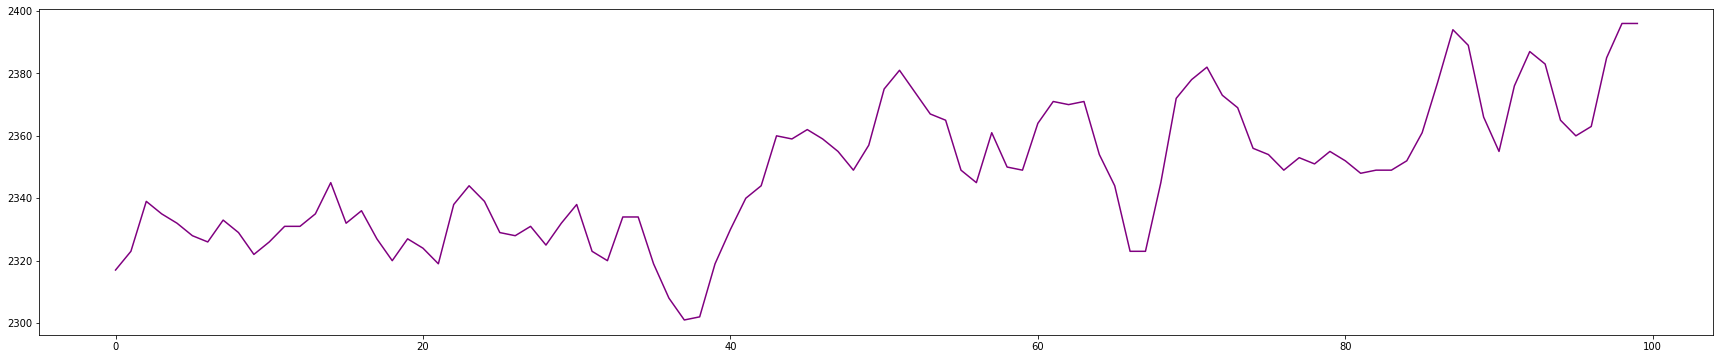

In [29]:
#build plot for LPF
plt.figure(figsize=(30,6))
plt.plot(df2["C"], color = "purple")
plt.show()

The plot as displayed, have a lot of noise and extreme value

In [60]:
#setting value for LPF model
fs = 100
x = np.arange(fs)
cutoff = 30
nyq = 0.5 * fs
order = 2

In [54]:
#building function LPF
def filter_lowpass(data, cutoff, fs, order):
  normal_cutoff = cutoff/nyq
  b, a = butter(order, normal_cutoff, btype="low")
  y = filtfilt(b,a, data)
  return y

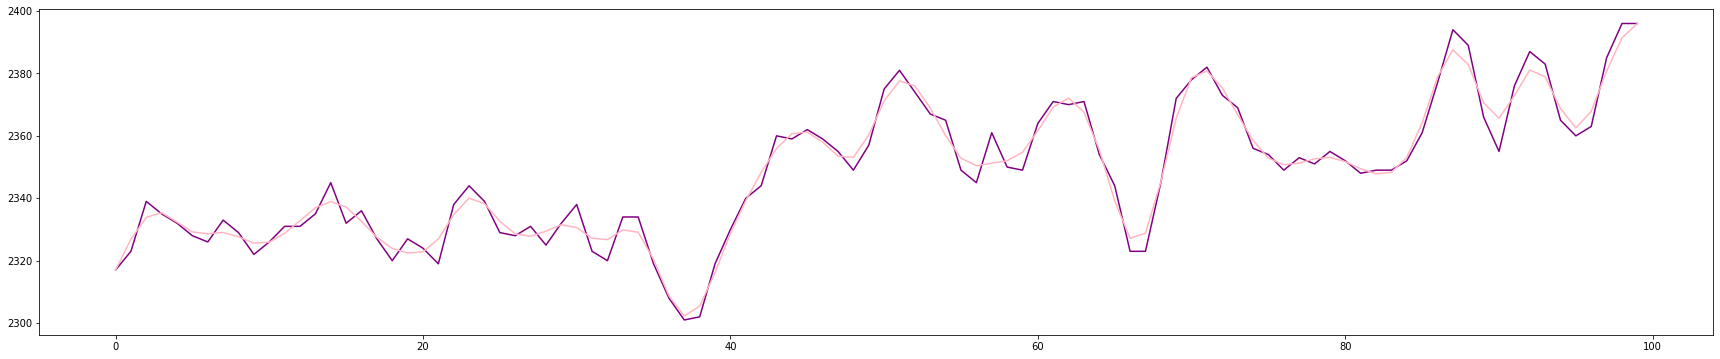

In [62]:
#build plot for filtered data
plt.figure(figsize=(30,6))
y = filter_lowpass(df2["C"], cutoff, fs, order)
plt.plot(df2["C"], color = "purple")
plt.plot(y, color = "lightpink")
plt.show()

As we see displayed plot, we can identify that the data preserve has smoother display and less noise. It proven that the lowpass filtering is work as espected. 

1. Plot the raw data and compared to LPF and MVA Filter.



2. Which frequency cut-off (fc) do you use for LPF? How do you determine that fc ? (please provide a plot of filtered data regarding the frequency cut-off you used)

Frequency cut-off (fc) that we use is 100 hz, its based on how much noise we want to filter on. The higher the value of (fc), the more noise is filtered, the lower the value of (fc), the less noise is filtered.

###Moving Average Filter and question no 3 and 4

In [35]:
#calculating moving average per window size
sma5 = df2["C"].rolling(5, min_periods=1).mean()
sma10 = df2["C"].rolling(10, min_periods=1).mean()
sma20 = df2["C"].rolling(20, min_periods=1).mean()

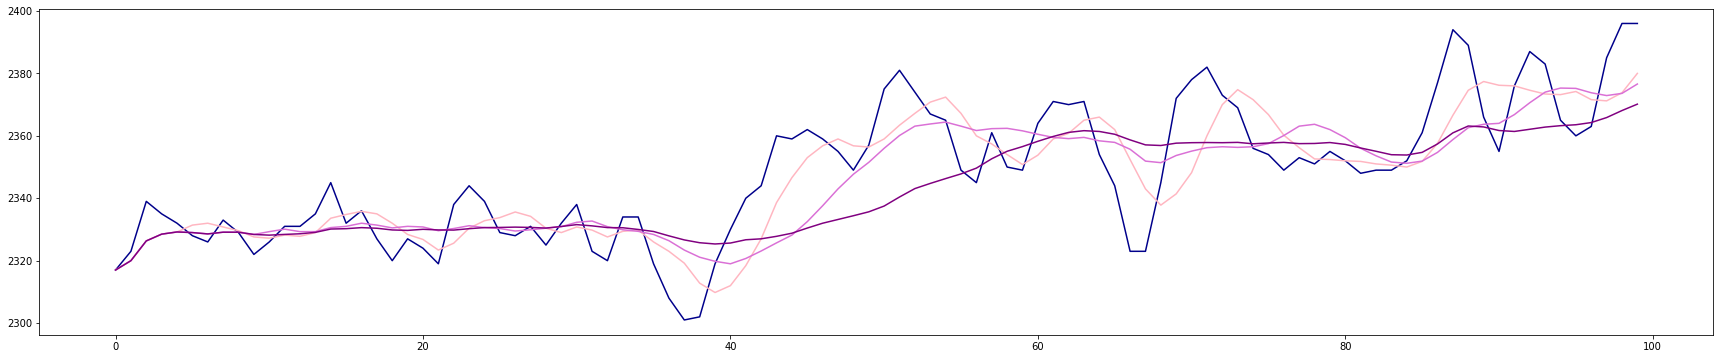

In [63]:
#build plot for all moving average and compare
plt.figure(figsize=(30,6))
plt.plot(df2["C"], color = "darkblue")
plt.plot(sma5, color = "lightpink")
plt.plot(sma10, color = "orchid")
plt.plot(sma20, color = "purple")

plt.show()

3. What is the windows size you used in MVA ?
(please select 3 different windows size, and then plot and compared the results).
Which windows size does give smooth data plot? Why? 

The window size we use is 3 value, 5 (lightpink), 10 (orchid) and 20 (purple). Basically, the lower value of the window size, the less noise filtered. In other hand, the higher value of the window size, the more noise filtered and the smoother the data plot. 

4. Please attach your listing program for LPF and MVA.